# The Physics of Sound, Part II

[return to main page](index.ipynb)

## Preparations

For this exercise we need the [Sound Field Synthesis Toolbox](http://sfstoolbox.org);

In [1]:
import sfs

And some other stuff:

In [2]:
# remove "inline" to get a separate plotting window:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.umath_tests import inner1d

A grid for computation and plotting:

In [3]:
grid = sfs.util.xyz_grid([-2, 2], [-2, 2], 0, spacing=0.01)

## Boundary Conditions

So far, we have only condisered so-called free-field propagation where no boundary conditions apply. However, free-field propagation is an invalid assumption in most pratical applications as walls and obstacles are present. These object imply boundary conditions to the sound pressure and/or to the sound velocity. Hence, the complete solution of the wave equation has to obey these conditions.  

<img src="data/volume.png" width="300"/>

Lets assume the scenario above with a bounded volume $V$ and its boundary $\partial V$ with the boundary normal $\mathbf n$.  
We classify three types of boundary conditions:

1. Dirichlet: $P (\mathbf x_0, \omega) = F_D(\mathbf  x_0, \omega)$,
2. Neumann: $\frac{\partial}{\partial \mathbf n} P (\mathbf x_0, \omega) = F_N(\mathbf x_0, \omega)$,
3. Robin: $\frac{\partial}{\partial \mathbf n} P (x_0, ω) + j\sigma(\mathbf x_0, \omega)P(\mathbf x_0, \omega) = F_R (\mathbf x_0, \omega)$

with $\mathbf x_0 \in \partial V$. As special case, the homogeneous boundary conditions are defined by

1. Dirichlet: $F_D(\mathbf  x_0, \omega) = 0$ aka. sound soft
2. Neumann:  $F_N(\mathbf  x_0, \omega) = 0$ aka. sound hard/rigid
3. Robin:  $F_R(\mathbf  x_0, \omega) = 0$ aka. mixed

*Exercise*: As a little repetition, what is denoted by $P(\mathbf x, \omega)$, again?

<font color='blue'>
*
$P(\mathbf x, \omega)$: Temporal spectrum of the sound pressure  
*
</font>

*Exercise*: What does the notation $\frac{\partial}{\partial \mathbf n} P (\mathbf x_0, \omega)$ mean?

<font color='blue'>
*
It is the so-called directional derivative of the sound field at the $\mathbf x_0$ along the direction defined by surface normal $\mathbf n = \mathbf n(\mathbf x_0)$ . It is defined by
<br />
$$ \frac{\partial}{\partial \mathbf n} P(\mathbf x_0, \omega)
    = \left( \mathbf n(\mathbf x) \cdot \nabla P(\mathbf x, \omega) \right) \big|_{\,\mathbf x = \mathbf x_0}
$$
*
</font>

## The Complete Solution of the Wave Equation

In the [last exercise](physics_of_sound_I.ipynb), we got to know the inhomogeneous Helmholtz equation

$$\Delta P(\mathbf x, \omega) + \left(\frac{\omega}{c}\right)^2 P(\mathbf x, \omega) = -Q(\mathbf x, \omega)$$

as the temporal Fourier Transform of the inhomogeneous wave equation.

*Exercise*: As a little repetition, what is denoted by $Q(\mathbf x, \omega)$, again?

<font color='blue'>
*
$Q(\mathbf x, \omega)$: Temporal spectrum of the source density
*
</font>

<img src="data/general.png" width="300"/>

The solution of inhomogeneous Helmholtz equation for a bounded region splits up into two parts

1. Contribution by the inhomogenity $Q(\mathbf x, \omega)$ inside $V$
2. Contribution by the inhomogeneous boundary conditions imposed on $\partial V$

Before going into detail with this both contributions, we need to introduce a important tool called the Green's function.

### The Green's Function

We got to know the some solutions of the inhomogeneous Helmholtz equation for specific $
Q(\mathbf x, \omega)$, like e.g. the plane wave, the point source, or the line source. The Green’s function $G(\mathbf x|\mathbf x_0 , \omega)$ is a versatile tool to express the solution of inhomogeneous Helmholtz Equation for any given density $Q(\mathbf x, \omega)$. It is the solution of the inhomogeneous Helmholtz Equation for a spatio(-temporal) Dirac pulse at $\mathbf x_0$ as inhomogeneity fulfilling potential initial and boundary conditions. Its density spectrum is hence defined 

$$Q_{G}(\mathbf x | \mathbf x_0, \omega) = \delta(\mathbf x - \mathbf x_0) = \delta(x-x_0)\delta(y-y_0)\delta(z-z_0)\,.$$ 

The Green's Function fulfils the inhomogeneous Helmholtz Equation

$$\Delta G(\mathbf x|\mathbf x_0 , \omega) + \left(\frac{\omega}{c}\right)^2 G(\mathbf x|\mathbf x_0 , \omega) = - \delta(\mathbf x - \mathbf x_0)\,.$$

#### Reciprocity Principle

In acoustics, generally the reciprocity principle holds.

*Exercise*: What does the reciprocity principle tell us?

<font color='blue'>
*One can exchange observer ($\mathbf x$) and source position ($\mathbf x_0$). $G(\mathbf x|\mathbf x_0 , \omega) = G(\mathbf x_0| \mathbf x, \omega)$*
</font>

#### Translation Invariance

Under free field propogation (no boundaries) the Green's Function $G(\mathbf x|\mathbf x_0 , \omega)$ is also called the free-field Green's function $G_0(\mathbf x|\mathbf x_0 , \omega)$. Here, the translation invariance $G_0(\mathbf x|\mathbf x_0 , \omega) = G_0(\mathbf x - \mathbf x_0 , \omega)$  holds. For three- or two-dimensional scenarios the free-field Green's function is a point source or line source, respectively.

*Exercise: What is the physical meaning of the translation invariance?*

<font color='blue'>
*Only the relative positions between observer and source matters. Shifting both quanties about the same amount does not change the acoustic conditions.*
</font>

*Exercise: Why is does an ordinary room, e.g. a seminar room, not fulfil the translation invariance*?

<font color='blue'>
*Walls and Obstacle imply boundary conditions. If e.g. a sound source and observer move closer to wall while maintaining their relative positions, then the reflection from that wall becomes stronger.*
</font>

### Contribution by the inhomegenity $Q(\mathbf x, \omega)$ inside $V$

We will now see how to use the Green's Function to express the solution of inhomogeneous Helmholtz equation for an arbitrary  inhomegenity $Q(\mathbf x, \omega)$.

*Exercise: Calculate the following Integral using the properties of the Dirac impulse.*

$$\int_{V} Q(\mathbf x_0, \omega) \delta(\mathbf x - \mathbf x_0) 
\,\mathrm d V(\mathbf x_0) \text{ with } \mathbf x \in V
$$

<font color='blue'>
*
Using the property of Dirac impulse  

$$\int_{a}^{b} f(x_0) \delta(x_0 - x) \mathrm d x_0 = f(x) \text{ with } \mathbf x \in [a,b] $$

and repeating this for the other dimenstions yields  

$$\int_{V} Q(\mathbf x_0, \omega) \delta(\mathbf x - \mathbf x_0)\,\mathrm d V(\mathbf x_0) = Q(\mathbf x, \omega)
$$
*
</font>

Now we know, how the density $Q(\mathbf x, \omega)$ of the sound field $P(\mathbf x, \omega)$ and the density $\delta(\mathbf x - \mathbf x_0)$ of the Green's function $G(\mathbf x|\mathbf x_0 , \omega)$ are related.

*Exercise: Keeping the linearity of the Helmholtz Equation in mind, how are $P(\mathbf x, \omega)$ and $G(\mathbf x|\mathbf x_0 , \omega)$ related? What is the physical meaning of this result?* 

<font color='blue'>
*
$$\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} 
Q(\mathbf x_0, \omega) G(\mathbf x|\mathbf x_0 , \omega)
\mathrm d x_0 \mathrm d y_0 \mathrm d z_0 = P(\mathbf x, \omega)
$$

A sound field with the density $Q(\mathbf x, \omega)$ can be expressed as the superposition of Green's functions, while the Green's function at $\mathbf x_0$ is weighted by $Q(\mathbf x_0, \omega)$.
*
</font>

## Contribution by the inhomogeneous boundary conditions imposed on $\partial V$

We have now handled any inhomegenity being present inside $V$. Hence, the contribution from the boundary states general solution of the **homogeneous** Helmholtz equation fulfilling the inhomogeneous boundary conditions

$$
P(\mathbf{x},\omega) =
\oint_{\partial V}\biggl[P(\mathbf{x}_0, \omega)\,\frac{\partial G(\mathbf{x}-\mathbf{x}_0, \omega)}{\partial \mathbf n(\mathbf{x}_0)}-G(\mathbf{x}-\mathbf{x}_0, \omega)
\,\frac{\partial P(\mathbf{x}_0, \omega)}{\partial \mathbf n(\mathbf{x}_0)}\biggr]\,\mathrm{d}A(\mathbf{x}_0)
$$
for $\mathbf{x} \in V$. This is equation is also known as the **Kirchhoff-Helmholtz integral** or the **Helmholtz integral equation**

*Exercise*: What type of sound field does $\displaystyle \frac{\partial G(\mathbf{x}-\mathbf{x}_0, \omega)}{\partial \mathbf n(\mathbf{x}_0)}$ represent under free-field conditions in 3D?

<font color='blue'>
*As the free-field Green's function in 3D is a point source located $\mathbf x_0$ the term present the directional derivative of a point source, which is the dipole source from the [last exercise](physics_of_sound_I.ipynb).*
</font>

Let's try out this integral for point source positioned outside $V$

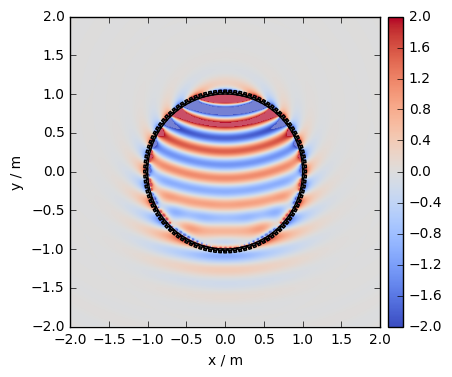

In [4]:
xs = 0,2,0  # position (metre)
f = 1000  # time-frequency (Hz)
omega = 2 * np.pi * f  # angular frequency (rad/s)

x0, n0, a0 = sfs.array.circular(100, 1)  # point and surface normals on a circular boundary
x0_grid = np.array([x0[:,0],x0[:,1],x0[:,2]])  # convert to grid

# sound pressure at boundary (x0)
p = sfs.mono.source.point(omega, xs, None, x0_grid)  

# directional gradient ("pressure gradient along n0")
v = sfs.mono.source.point_velocity(omega, xs, None, x0_grid)*(-1j)*sfs.defs.rho0*omega  # pressure gradient at boundary
vx, vy, vz = sfs.util.as_xyz_components(v)  # split gradient into components for x,y,z
v_n0 = vx*n0[:,0] + vy*n0[:,1] + vz*n0[:,2]  # dot product of pressure gradient and boundary normal n0

# single layer potential (sound field generate by secondary monopole source)
p_single = sfs.mono.synthesized.generic(omega, x0, n0, -v_n0 * a0 , grid, source=sfs.mono.source.point)
# double layer potential (sound field generated by secondary dipole source)
p_double = sfs.mono.synthesized.generic(omega, x0, n0, p * a0 , grid, source=sfs.mono.source.point_dipole)

sfs.plot.soundfield(4*np.pi*(p_single + p_double), grid);
sfs.plot.loudspeaker_2d(x0,n0)

*Exercise*: What happens, if you put the point source inside the circle?

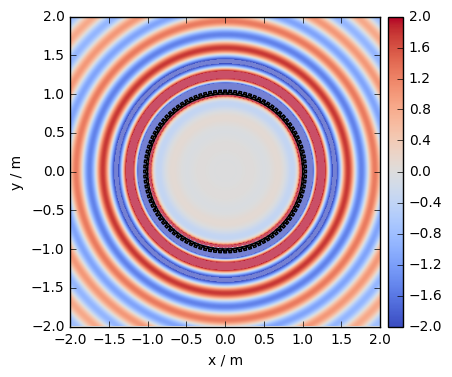

In [5]:
xs = 0,0,0  # position (metre)
f = 1000  # time-frequency (Hz)
omega = 2 * np.pi * f  # angular frequency (rad/s)

x0, n0, a0 = sfs.array.circular(100, 1)  # point and surface normals on a circular boundary
x0_grid = np.array([x0[:,0],x0[:,1],x0[:,2]])  # convert to grid

# sound pressure at boundary (x0)
p = sfs.mono.source.point(omega, xs, None, x0_grid)  

# directional gradient ("pressure gradient along n0")
v = sfs.mono.source.point_velocity(omega, xs, None, x0_grid)*(-1j)*sfs.defs.rho0*omega  # pressure gradient at boundary
vx, vy, vz = sfs.util.as_xyz_components(v)  # split gradient into components for x,y,z
v_n0 = vx*n0[:,0] + vy*n0[:,1] + vz*n0[:,2]  # dot product of pressure gradient and boundary normal n0

# single layer potential (sound field generate by secondary monopole source)
p_single = sfs.mono.synthesized.generic(omega, x0, n0, -v_n0 * a0 , grid, source=sfs.mono.source.point)
# double layer potential (sound field generated by secondary dipole source)
p_double = sfs.mono.synthesized.generic(omega, x0, n0, p * a0 , grid, source=sfs.mono.source.point_dipole)

sfs.plot.soundfield(4*np.pi*(p_single + p_double), grid);
sfs.plot.loudspeaker_2d(x0,n0)

*Exercise*: Explain the obversation from above? Hind: Is the volume $V$ free of inhomogenities?

## Solutions

If you had problems solving some of the exercises, don't despair!
Have a look at the [example solutions](physics_of_sound_II-solutions.ipynb).

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>